In [29]:
from models.classifier import Classifier
from models.dataloader import DataLoader
import matplotlib.pyplot as plt
import numpy as np

import torch

In [12]:
model = Classifier().cuda()
dloader = DataLoader(train=False, batch_size=256)

In [13]:
model.eval()
model.load("ckpts/clf.pth")

Classifier was loaded


In [36]:
x, y = next(dloader.next_batch())
print(x.shape)

(256, 1, 28, 28)


In [37]:
x = torch.FloatTensor(x).cuda()
x = model.features(x)
x = x.view(x.size(0), -1)
x = x.cpu().detach().numpy()
print(x.shape)

(256, 192)


In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)

In [40]:
pca.fit(x)
x_pca = pca.transform(x)

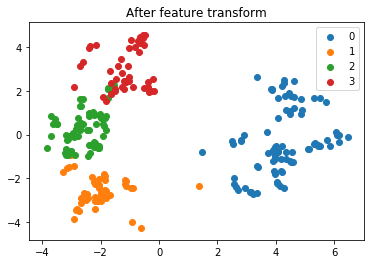

In [42]:

plt.title("After feature transform")
plt.scatter(x_pca[y==0, 0], x_pca[y==0,1], label="0")
plt.scatter(x_pca[y==1, 0], x_pca[y==1,1], label="1")
plt.scatter(x_pca[y==2, 0], x_pca[y==2,1], label="2")
plt.scatter(x_pca[y==3, 0], x_pca[y==3,1], label="3")
plt.legend()
plt.show()